## Import Library

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential,layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Baca Dataset

In [2]:
data = pd.read_csv('new_train.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


## Split data menjadi train dan test

In [3]:
#ubah target dan fitur menjadi float
le = LabelEncoder()
data['loan'] = le.fit_transform(data['loan']).astype('float64')
data['age'] = le.fit_transform(data['age']).astype('float64')
data['duration'] = le.fit_transform(data['duration']).astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          32950 non-null  float64
 1   job          32950 non-null  object 
 2   marital      32950 non-null  object 
 3   education    32950 non-null  object 
 4   default      32950 non-null  object 
 5   housing      32950 non-null  object 
 6   loan         32950 non-null  float64
 7   contact      32950 non-null  object 
 8   month        32950 non-null  object 
 9   day_of_week  32950 non-null  object 
 10  duration     32950 non-null  float64
 11  campaign     32950 non-null  int64  
 12  pdays        32950 non-null  int64  
 13  previous     32950 non-null  int64  
 14  poutcome     32950 non-null  object 
 15  y            32950 non-null  object 
dtypes: float64(3), int64(3), object(10)
memory usage: 4.0+ MB


In [4]:
x = data[['age','duration']]
y = data['loan'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

print ("______ TRAIN TEST SPLIT ______")
print ("______________________________")
print ("| Dimensi x_train |", x_train.shape, "|")
print ("| Dimensi x_test  |", x_test.shape, "|")
print ("| Dimensi y_train |", y_train.shape, "  |")
print ("| Dimensi y_test  |", y_test.shape, "  |")
print ("______________________________")

______ TRAIN TEST SPLIT ______
______________________________
| Dimensi x_train | (16475, 2) |
| Dimensi x_test  | (16475, 2) |
| Dimensi y_train | (16475,)   |
| Dimensi y_test  | (16475,)   |
______________________________


## Lakukan Preprocessing (saya akan melakukan cleaning  pada data duplicated)

In [5]:
# cek data duplicated
print("Data Duplicated : ",data.duplicated().sum())

Data Duplicated :  8


In [6]:
# melakukan cleaning data duplicated
data.drop_duplicates(inplace = True)
data.duplicated().sum()
print("Jumlah data duplicated setelah melakukan data cleaning dengan fungsi drop_duplicated")
print("Data Duplicated : ", data.duplicated().sum())

Jumlah data duplicated setelah melakukan data cleaning dengan fungsi drop_duplicated
Data Duplicated :  0


## Gunakan Sequential Model

In [7]:
# cek shape untuk menyesuaikan di input layer
x_train.shape

(16475, 2)

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       32950 non-null  float64
 1   duration  32950 non-null  float64
dtypes: float64(2)
memory usage: 515.0 KB


In [9]:
model = Sequential([
    layers.Dense(16,activation = 'relu',input_shape =(2,)),
    layers.Dense(32,activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
])

## Sesuaikan loss dan metrics dengan target

In [10]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 625 (2.44 KB)
Trainable params: 625 (2.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Lakukan evaluasi model terhadap data test

### Buat Callback untuk membuat batasan pada accuracy

In [12]:
from tensorflow.keras.callbacks import Callback

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') is not None and logs.get('accuracy') >= 0.85:
            print("\nAkurasi telah mencapai 80%, proses pelatihan dihentikan.")
            self.model.stop_training = True
     

custom_callback = CustomCallback()
     

### Training model terlebih dahulu

In [13]:
data_train = model.fit(x_train,y_train, epochs = 100 ,validation_data = (x_test, y_test) ,callbacks=[custom_callback])

Epoch 1/100
515/515 [==============================] - 5s 7ms/step - loss: 0.8870 - accuracy: 0.6625 - val_loss: 0.9911 - val_accuracy: 0.8209
Epoch 2/100
515/515 [==============================] - 3s 7ms/step - loss: 0.7659 - accuracy: 0.7215 - val_loss: 0.6450 - val_accuracy: 0.8209
Epoch 3/100
515/515 [==============================] - 3s 7ms/step - loss: 0.7857 - accuracy: 0.7125 - val_loss: 0.9685 - val_accuracy: 0.8191
Epoch 4/100
515/515 [==============================] - 4s 7ms/step - loss: 0.7743 - accuracy: 0.7145 - val_loss: 1.1304 - val_accuracy: 0.8210
Epoch 5/100
515/515 [==============================] - 4s 7ms/step - loss: 0.7741 - accuracy: 0.7073 - val_loss: 0.9072 - val_accuracy: 0.8211
Epoch 6/100
515/515 [==============================] - 3s 7ms/step - loss: 0.8115 - accuracy: 0.6907 - val_loss: 0.6924 - val_accuracy: 0.8211
Epoch 7/100
515/515 [==============================] - 3s 7ms/step - loss: 0.7515 - accuracy: 0.7358 - val_loss: 0.6389 - val_accuracy: 0.8206

### Akurasi di evaluate model

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6372430324554443
Test accuracy: 0.8210622072219849


## Grafik Akurasi

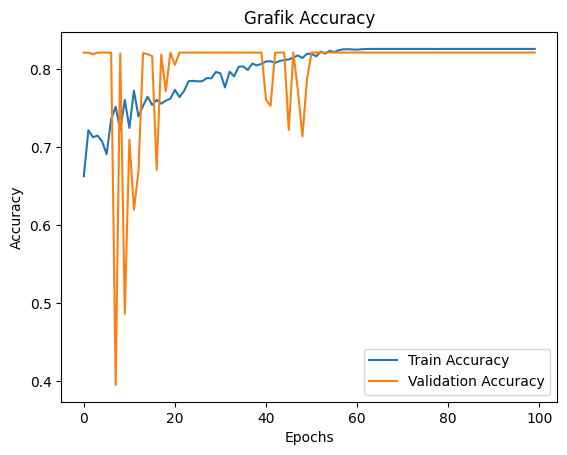

In [15]:
import matplotlib.pyplot as plt
plt.plot(data_train.history['accuracy'], label='Train Accuracy')
plt.plot(data_train.history['val_accuracy'], label='Validation Accuracy')
plt.title('Grafik Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Grafik Loss

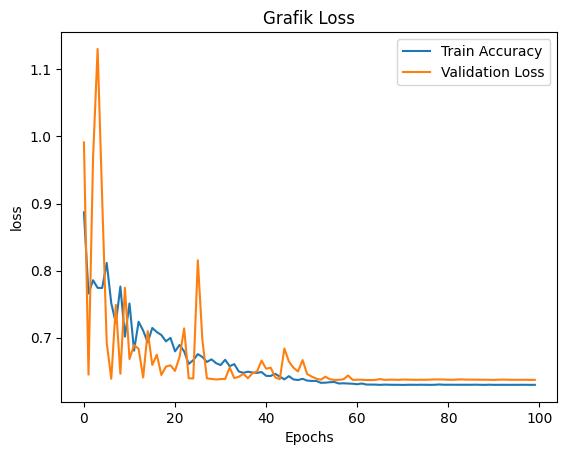

In [16]:
import matplotlib.pyplot as plt
plt.plot(data_train.history['loss'], label='Train Accuracy')
plt.plot(data_train.history['val_loss'], label='Validation Loss')
plt.title('Grafik Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()